# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [5]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 640x480 with 0 Axes>

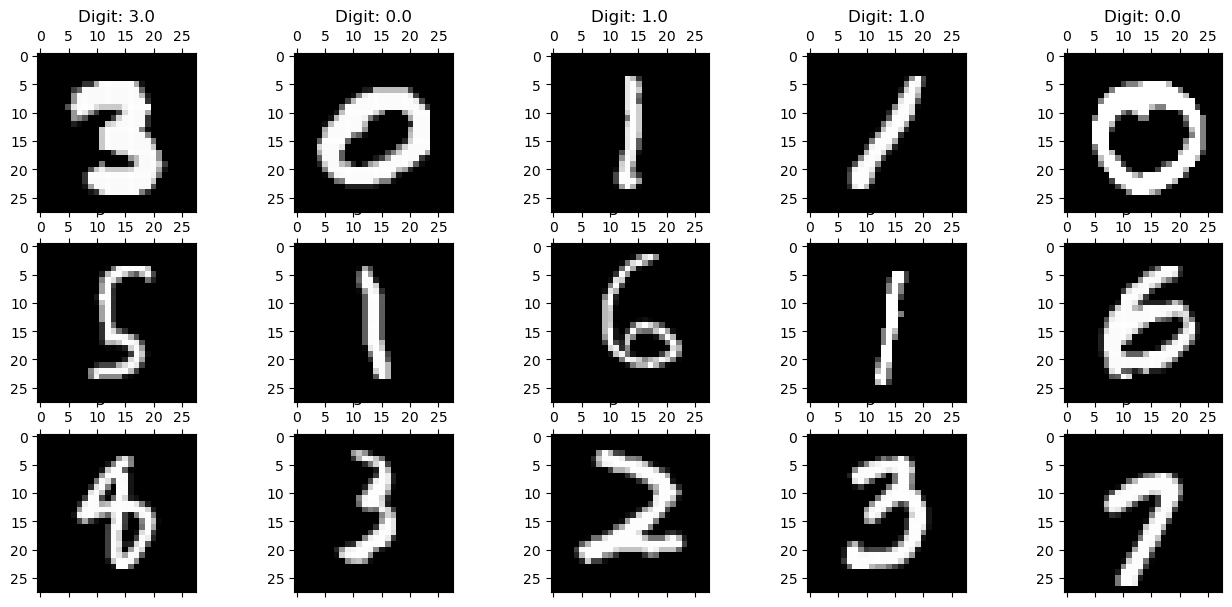

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['y'], test_size=0.2, random_state=42)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

### PCA 

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_sc = scaler.fit_transform(X_train)

X_sc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
pca = PCA()
p = pca.fit_transform(X_sc)
p

array([[-4.41386721e+00, -4.32425724e+00, -1.47370956e+00, ...,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [-5.73912994e+00,  4.28050575e+00, -3.76767028e+00, ...,
         6.17351854e-15,  1.36344016e-14, -1.59540572e-16],
       [-6.60665768e+00,  1.38377707e+00,  2.02016237e+00, ...,
         1.78415056e-15, -3.83351706e-15,  1.22307339e-15],
       ...,
       [-2.31224438e+00,  5.71394235e+00, -2.02031916e+00, ...,
         1.01228136e-17, -5.98732005e-18,  1.02228919e-17],
       [ 1.80953182e+01, -1.08980213e+01, -3.10596496e+00, ...,
         2.59852536e-17,  2.28416785e-17, -7.55901183e-18],
       [ 1.76724936e+00,  6.39369361e+00,  8.71363186e+00, ...,
         2.34925280e-17,  2.49479571e-19, -9.54372851e-18]])

#### Accumulated Scree Plot

Text(0, 0.5, 'cumulative variance')

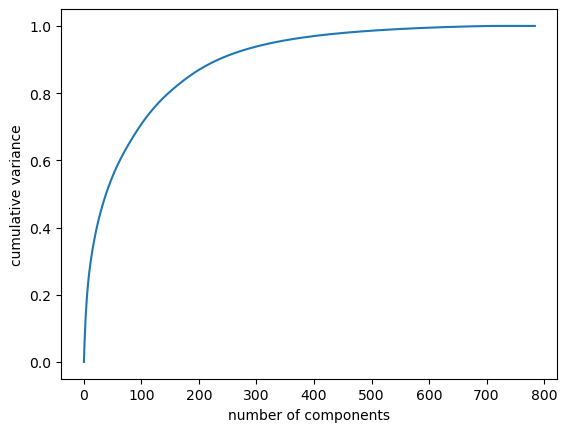

In [21]:
cumexp=np.concatenate([[0], pca.explained_variance_ratio_])
plt.plot(np.cumsum(cumexp))
plt.xlabel("number of components")
plt.ylabel("cumulative variance")

In [28]:
print("Eigen value : ", pca.explained_variance_[0:150]) # eigenvalue, lambda
print()
print("주성분에 의해 설명되는 비율 : ", pca.explained_variance_ratio_[0:150]) # 처음 k개의 주성분에 의해 설명되는 변동의 비율
print()
print("주성분에 의해 설명되는 누적 비율 : ", np.cumsum(pca.explained_variance_ratio_)[:150])

Eigen value :  [40.63902529 29.07495131 26.90099853 20.71063848 18.13004519 15.69386839
 13.77256858 12.50122341 11.03575126 10.02284268  9.6712065   8.62117736
  8.02176238  7.82989223  7.39228445  7.14755077  6.71244096  6.58682288
  6.40258286  6.18849132  5.92937741  5.708132    5.48593305  5.33579038
  5.18385958  4.95503963  4.89434579  4.72888354  4.51122419  4.39642265
  4.2982486   4.2778775   4.10412497  4.06613745  4.02515382  3.9743763
  3.84326696  3.76882105  3.69829845  3.67663636  3.43904014  3.43478826
  3.34783751  3.27961231  3.24402269  3.17330696  3.1545146   3.11950964
  3.08753921  3.05995671  2.94130568  2.88584324  2.84311293  2.79284543
  2.74873567  2.70390939  2.68891058  2.5903584   2.56924448  2.51891871
  2.50721323  2.47393328  2.46071544  2.42922843  2.40810168  2.39509541
  2.3263514   2.29862706  2.26882922  2.23260772  2.21882868  2.21259433
  2.18238445  2.15977412  2.14072072  2.12860119  2.10979895  2.08269474
  2.07390927  2.05810492  2.04259542 

- 150번째 주성분까지 사용할 때 누적 설명률이 80%를 초과하므로 150번째 PC까지 선택하기로 함.

In [34]:
# 150번째 PC까지 사용해 차원축소

X_train_pca = pd.DataFrame(p[:, :150])
X_train_pca

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,-4.413867,-4.324257,-1.473710,0.045293,4.966454,3.554119,2.570561,0.312664,0.337358,3.435418,...,1.160960,0.349357,-0.471904,-1.058750,0.102726,-0.188399,0.939588,-1.865993,-1.779894,0.133370
1,-5.739130,4.280506,-3.767670,0.660006,1.422239,-1.105599,-1.053722,2.067936,-5.103138,1.617630,...,0.337780,1.066174,-0.053450,-0.688186,-0.894086,0.293562,0.583492,0.412958,0.021477,1.164620
2,-6.606658,1.383777,2.020162,0.646272,0.778156,-4.383096,-0.327532,-0.512999,0.635173,-0.129259,...,-0.520311,0.262636,1.334576,-0.585308,-0.488309,0.882834,-0.314349,-0.625631,0.286438,-0.502525
3,7.792853,12.539546,5.356697,-3.841038,4.132901,-0.076673,0.410094,-2.926452,4.613254,1.665753,...,-0.217331,0.910553,-1.136738,-0.597519,-1.090960,-1.106314,0.825685,-0.580863,-0.895665,-0.459656
4,8.488038,-0.447616,-3.318620,-4.966371,-0.782200,-5.943380,-0.744919,-3.789597,-0.922321,0.213844,...,0.325095,-0.206242,-0.432954,-0.901119,0.730738,0.170954,0.262014,0.086379,0.369121,0.201825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,-5.289001,-2.059788,0.887131,9.839524,-5.597281,1.065783,1.203690,1.630160,2.178331,0.513898,...,-2.148565,-2.013568,1.404015,2.981672,-0.632559,0.222984,-2.882509,1.062821,-1.238498,0.608528
55996,-7.245400,-1.914355,3.428727,0.897436,6.630486,0.199761,1.602891,-2.797801,-1.193189,-1.114734,...,-0.153263,-0.139876,0.691511,-0.413756,-0.027579,0.295331,-0.074045,0.173501,-0.046523,0.585301
55997,-2.312244,5.713942,-2.020319,2.897420,-0.982686,-1.458923,3.665956,-3.821017,-2.686325,1.630032,...,-0.555586,0.823236,0.026357,-0.818893,0.065507,-0.808157,-0.150768,-0.162599,0.548648,0.771656
55998,18.095318,-10.898021,-3.105965,-7.099311,-0.330020,-2.327822,-4.137461,3.101961,4.442579,-2.461451,...,0.846158,-0.120902,0.879737,-0.273256,-1.425528,-0.176294,0.339263,-0.541374,-0.950196,0.612014


In [37]:
# test data에도 동일한 처리

X_test_pca = pca.transform(X_test)
X_test_pca

C:\Users\judyj\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


array([[ 6.86887946e+02,  1.94194966e+02, -1.14725423e+03, ...,
        -2.54200519e-13,  6.63069439e-14, -4.21725522e-14],
       [ 6.87637890e+02, -6.40544826e+02, -3.11918318e+02, ...,
         1.38650163e-13, -1.25890917e-15,  4.24517861e-15],
       [ 1.37202481e+03, -6.82902745e+00,  4.03783549e+02, ...,
        -4.51832537e-14,  5.26072905e-14,  9.31241696e-14],
       ...,
       [ 4.10511654e+02, -4.26752501e+01,  5.64799050e+02, ...,
        -4.74207903e-15, -7.90020596e-14,  1.67589777e-13],
       [ 1.16449177e+03,  7.26727055e+02, -3.47657661e+02, ...,
         9.59907111e-14, -5.31095228e-14,  9.46979975e-14],
       [ 7.78151770e+02,  4.55263022e+02,  4.30258344e+02, ...,
        -8.78691606e-14,  5.56596449e-14, -3.25032035e-14]])

In [38]:
X_test_pca = pd.DataFrame(X_test_pca[:, :150])
X_test_pca

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,686.887946,194.194966,-1147.254230,-262.945833,-465.595823,535.672808,-652.041823,423.384204,-41.649139,-197.053438,...,-72.447871,28.278163,-2.542800,-44.944383,-71.234483,-78.207111,35.287475,-83.561758,-6.987154,7.777471
1,687.637890,-640.544826,-311.918318,-821.427607,-1084.180343,901.129568,-415.947754,-415.815619,550.074624,-670.571298,...,39.524614,-7.764143,77.774751,-76.112240,-0.936330,100.169076,-47.583022,-146.283709,16.900625,-38.916841
2,1372.024814,-6.829027,403.783549,-114.100455,-1141.355927,283.514881,-484.927587,-312.924735,344.075342,-888.066157,...,-67.598909,-50.842455,118.133853,28.412940,65.916236,-12.619564,-90.165113,57.279687,-1.197763,76.410540
3,361.645509,-161.320303,-377.752585,-957.418264,-652.618752,192.606922,-614.211507,349.538809,266.904899,-458.522008,...,-10.811599,-112.762161,32.598709,77.167905,-90.942955,-71.152472,82.610096,-56.996881,-86.840357,2.825197
4,155.169872,189.039736,-688.821735,-323.357059,-376.469368,988.462836,-940.710375,525.345176,-34.782658,-655.280858,...,-16.049738,-2.175589,76.687200,-40.154817,1.404822,52.273230,44.614491,-24.300002,65.015855,-51.999556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,867.221746,-462.929038,641.400810,-1230.813712,-1018.524779,278.371856,-334.149771,792.162685,51.129691,-530.859355,...,35.655450,21.645322,-22.082424,11.941575,10.565289,2.858789,38.944756,26.528488,12.820597,-23.674650
13996,1033.705284,-626.195089,251.213698,6.445329,-1106.189472,984.542841,-422.462294,380.593943,482.258839,-838.703457,...,-8.727173,-28.814984,68.450647,86.897821,16.544865,-19.274816,7.643100,33.169195,34.088012,92.178893
13997,410.511654,-42.675250,564.799050,-918.157316,-739.232196,213.689058,-354.689068,75.733349,-33.448014,-184.399581,...,-138.948179,-7.524215,-16.084067,76.946861,-64.261774,-33.958894,42.156027,-9.183038,-2.770368,5.559109
13998,1164.491774,726.727055,-347.657661,-46.427190,-1283.891350,715.989303,-128.017103,-322.246506,267.157372,152.634185,...,106.035188,-39.238466,-109.683003,-51.295431,11.490815,-34.728096,-56.152204,-20.735723,-62.464722,-51.336254


### LDA

In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
X_train_lda = lda.fit_transform(X_sc, y_train)

In [63]:
X_test_lda = lda.transform(X_test)

C:\Users\judyj\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


In [60]:
lda.explained_variance_ratio_

array([0.23708117, 0.20328823, 0.17798282, 0.10633489, 0.09415639,
       0.06896763, 0.04990535, 0.03507761, 0.02720591])

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 - KNN, Decision Tree

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

#### 원본 데이터

In [67]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# params = {'n_neighbors':[x for x in range(3, 51) if x % 2 != 0],
#           'p': [1,2],
#          'weights':['uniform', 'distance']}

# kfold = KFold(n_splits=5, shuffle = True, random_state=0)

# knn = KNeighborsClassifier()
# grid_cv = GridSearchCV(knn, param_grid = params, cv = kfold, n_jobs = -1)

# start = time.time()
# grid_cv.fit(X_train_pca, y_train)
# end = time.time()

# print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
# print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [79]:
def evaluation(y_true, y_pred):
    print('accuracy_score:', round(accuracy_score(y_true, y_pred), 3))
    print('recall_score:', round(recall_score(y_true, y_pred, average='macro'), 3))
    print('precision_score:', round(precision_score(y_true, y_pred, average='macro'), 3))
    print('confusion_matrix\n', confusion_matrix(y_true, y_pred))

In [95]:
knn = KNeighborsClassifier()

start = time.time()
knn.fit(X_train, y_train)
end = time.time()

print('elapsed time for training:', end-start)

print()

y_pred = knn.predict(X_test)
print('<test evaluation>')
evaluation(y_test, y_pred)

elapsed time for training: 0.044881343841552734

<test evaluation>
accuracy_score: 0.972
recall_score: 0.971
precision_score: 0.972
confusion_matrix
 [[1341    0    0    0    0    1    4    0    1    2]
 [   0 1575    2    0    0    0    1    2    0    1]
 [   8   15 1345    3    2    1    2   19    5    0]
 [   1    1    7 1396    0   13    0    7    4    5]
 [   0    8    0    0 1283    0    3    3    1   30]
 [   4    4    2   14    1 1236   15    2    4    4]
 [   7    2    0    0    3    2 1393    0    0    0]
 [   1   17    2    0    4    0    0 1433    1   18]
 [   7   16    4   13    9   15    1    3 1313   10]
 [   3    4    3   11    7    5    1   18    7 1289]]


In [94]:
tree = DecisionTreeClassifier(max_depth=20, min_samples_split=100, min_samples_leaf=20)

start = time.time()
tree.fit(X_train, y_train)
end = time.time()

print('elapsed time for training:', end-start)
print()

y_pred = tree.predict(X_test)
print('<test evaluation>')
evaluation(y_test, y_pred)

elapsed time for training: 24.192290782928467

<test evaluation>
accuracy_score: 0.842
recall_score: 0.84
precision_score: 0.84
confusion_matrix
 [[1230    1   16   12   16   16   16    6   32    4]
 [   0 1503   15   11    6   15    3    7   12    9]
 [  36   25 1092   40   30   25   28   34   65   25]
 [  14   15   25 1184   15   68    6   28   49   30]
 [   4    2   21   12 1097   21   22   16   46   87]
 [  21   12   13   80   25 1016   35    5   47   32]
 [  36   13   33    8   30   38 1215    7   23    4]
 [  10   11   29   19   21   12    3 1309   21   41]
 [  11   31   35   35   63   45   29   11 1084   47]
 [  17    6   14   44   76   28    8   43   50 1062]]


#### PCA 축소 데이터

In [86]:
knn = KNeighborsClassifier()

start = time.time()
knn.fit(X_train_pca, y_train)
end = time.time()

print('elapsed time for training:', end-start)

print()

y_pred = knn.predict(X_test_pca)
print('<test evaluation>')
evaluation(y_test, y_pred)

elapsed time for training: 0.07878684997558594

<test evaluation>
accuracy_score: 0.827
recall_score: 0.823
precision_score: 0.866
confusion_matrix
 [[1335    0    0    0    0    0    1    0   12    1]
 [  28 1451   18   12    1    0    4    4   59    4]
 [ 113    0 1233   14    0    0    4    3   30    3]
 [ 113    1   42 1172    0   10    1    8   81    6]
 [ 242    2    2    4  792    0   19    8   94  165]
 [ 213    0    4   75    0  745   15    0  223   11]
 [ 103    0    1    1    3    2 1269    0   28    0]
 [  47    0   45   25    2    0    2 1260   39   56]
 [  74    2    9   20    1    3    2    1 1276    3]
 [  88    0    2   12    5    6    0   64  126 1045]]


In [87]:
tree = DecisionTreeClassifier(max_depth=20, min_samples_split=100, min_samples_leaf=20)

start = time.time()
tree.fit(X_train_pca, y_train)
end = time.time()

print('elapsed time for training:', end-start)
print()

y_pred = tree.predict(X_test_pca)
print('<test evaluation>')
evaluation(y_test, y_pred)

elapsed time for training: 29.465075254440308

<test evaluation>
accuracy_score: 0.379
recall_score: 0.37
precision_score: 0.512
confusion_matrix
 [[ 980    0   62   45    0   34    3    0  225    0]
 [   5 1262    7   70    0    0   11    7  218    1]
 [ 144    5  560  384    0    5   79    2  221    0]
 [ 113    5    4 1040    1    8    1    5  257    0]
 [ 201    7    4   12  105    0    1    9  879  110]
 [ 557    0   34  273    1   10    3    0  407    1]
 [ 249    3  580   74    5    5  240    0  251    0]
 [ 363   12    0   37    5    0    0   83  792  184]
 [ 251    8   39  281    0    0    0    0  809    3]
 [ 301    6    0   29   20    0    3    8  766  215]]


#### LDA 축소 데이터 

In [90]:
knn = KNeighborsClassifier()

start = time.time()
knn.fit(X_train_lda, y_train)
end = time.time()

print('elapsed time for training:', end-start)

print()

y_pred = knn.predict(X_test_lda)
print('<test evaluation>')
evaluation(y_test, y_pred)

elapsed time for training: 0.2902653217315674

<test evaluation>
accuracy_score: 0.804
recall_score: 0.801
precision_score: 0.85
confusion_matrix
 [[1288    0   14    2    4    0   14    0   24    3]
 [   1 1169   42   10    1    0    1    1  354    2]
 [  15    2 1248   18   10    0   15   18   65    9]
 [  13    0   82 1191    1    8    9   12  109    9]
 [   2    5   17    3 1142    0   30    2   49   78]
 [ 100    2   52   75   15  328   30    2  659   23]
 [  18    0   85    0    1    2 1288    0   12    1]
 [  17    7   40   26   30    1    3 1282   32   38]
 [   9    6   22   36    3    3   13    0 1286   13]
 [  17    1   14   32   61    1    1   78  105 1038]]


In [91]:
tree = DecisionTreeClassifier(max_depth=20, min_samples_split=100, min_samples_leaf=20)

start = time.time()
tree.fit(X_train_lda, y_train)
end = time.time()

print('elapsed time for training:', end-start)
print()

y_pred = tree.predict(X_test_lda)
print('<test evaluation>')
evaluation(y_test, y_pred)

elapsed time for training: 2.087416648864746

<test evaluation>
accuracy_score: 0.562
recall_score: 0.563
precision_score: 0.607
confusion_matrix
 [[1052    3    1    4    3  173   94    6    7    6]
 [   2  504   29   24    1    0   14    3 1004    0]
 [  58   35  734  447   21    4   43   12   36   10]
 [  37    4   29  993    5   69   34   42  218    3]
 [   0    1    6    0 1090    0  103    3  100   25]
 [  52    5   17   47   10  502  229   63  358    3]
 [   7  106  357    1   12    4  790    1  124    5]
 [  17   69   53   91   68    0    4 1087   21   66]
 [  10   16   37   60   20   88  129   16 1012    3]
 [  13    4    7   15  259    5   24  192  720  109]]


- KNN 모델의 경우 원본 데이터, PCA 축소 데이터, LDA 축소 데이터 순으로 training 시간도 짧고 성능도 우수함
- Decision Tree 모델의 경우 차원축소한 데이터는 별로 성능이 안 좋아보임...

특정한 틀 없이 자유롭게 해주시면 됩니다!